# 📊 Regression Analysis on Insurance Data

In this notebook, we perform both **simple linear regression** and **polynomial regression** to explore the relationship between:
- **Age** and **Expenses**
- **BMI** and **Expenses**

The dataset is taken from an insurance database and contains features like age, BMI, expenses, etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("A:/EDIC ML Summer Internship/Machine-Learning-Internship/Assignment 1/insurance.csv")


In [2]:
X = df['age'].values
y = df['expenses'].values

def simple_linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    numerator = sum((X - x_mean) * (y - y_mean))
    denominator = sum((X - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

def predict_linear(X, slope, intercept):
    return slope * X + intercept

slope, intercept = simple_linear_regression(X, y)
y_pred_linear = predict_linear(X, slope, intercept)


In [3]:
def polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return theta

def predict_polynomial(X, theta):
    degree = len(theta) - 1
    X_poly = polynomial_features(X, degree)
    return X_poly @ theta

theta_deg2 = polynomial_regression(X, y, degree=2)
y_pred_deg2 = predict_polynomial(X, theta_deg2)

theta_deg3 = polynomial_regression(X, y, degree=3)
y_pred_deg3 = predict_polynomial(X, theta_deg3)



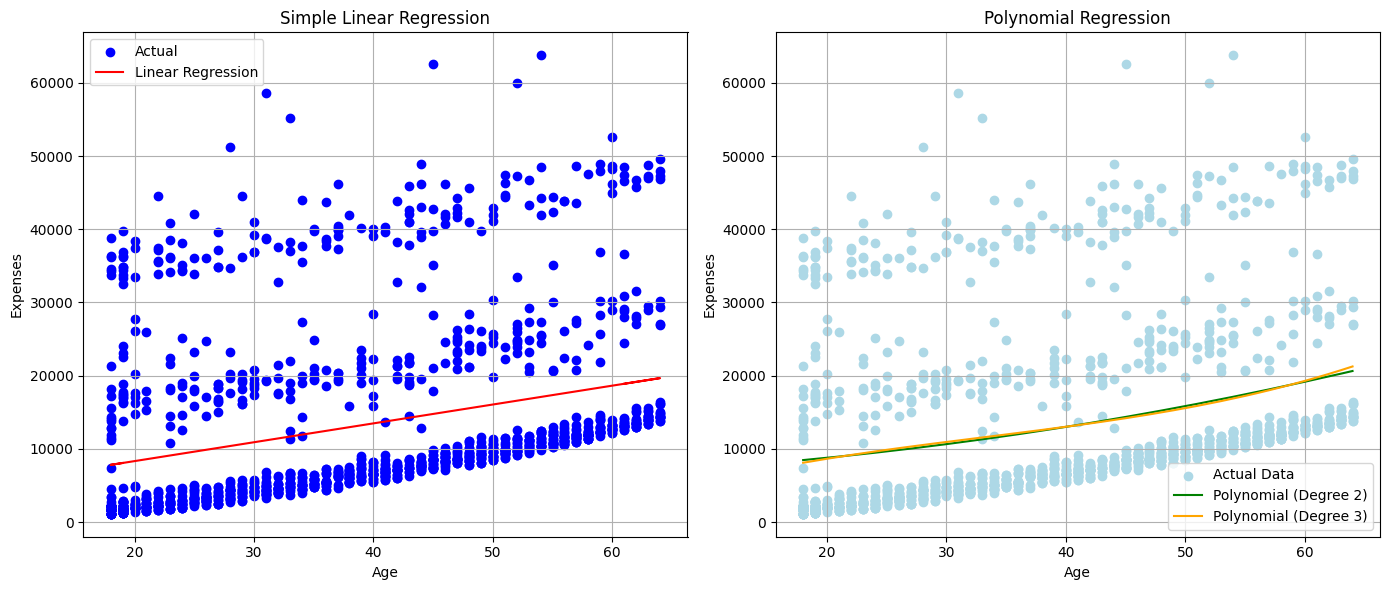

In [4]:
sorted_idx = np.argsort(X)
X_sorted = X[sorted_idx]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='lightblue', label='Actual Data')
plt.plot(X_sorted, y_pred_deg2[sorted_idx], color='green', label='Polynomial (Degree 2)')
plt.plot(X_sorted, y_pred_deg3[sorted_idx], color='orange', label='Polynomial (Degree 3)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 🔹 Regression: BMI vs Expenses
We now analyze the relationship between **BMI** and **Expenses** using both simple and polynomial regression.


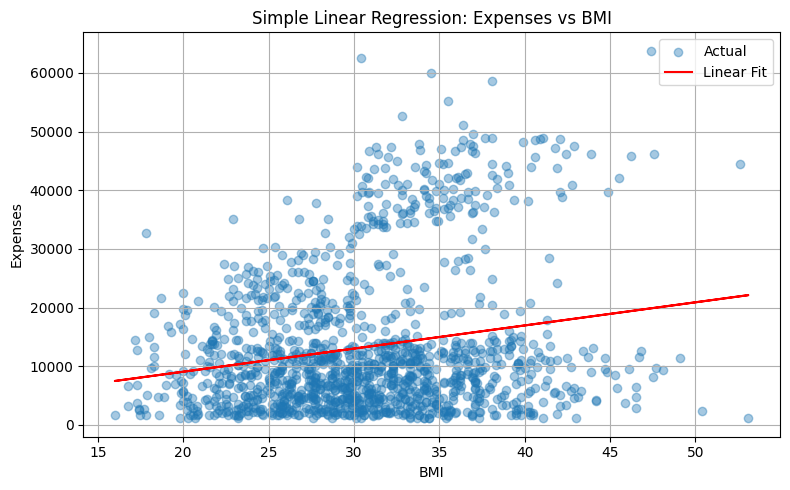

In [5]:
X = df['bmi'].values
y = df['expenses'].values

def simple_linear_regression(X, y):
    x_mean, y_mean = np.mean(X), np.mean(y)
    slope = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

slope, intercept = simple_linear_regression(X, y)
y_pred = slope * X + intercept

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.4, label='Actual')
plt.plot(X, y_pred, color='red', label='Linear Fit')
plt.title('Simple Linear Regression: Expenses vs BMI')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


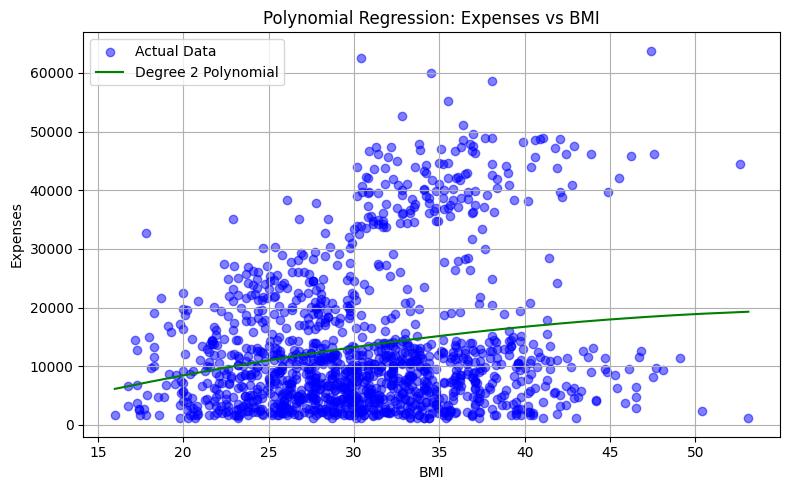

In [6]:
def poly_features(X, degree):
    features = [X**i for i in range(degree + 1)]
    return np.vstack(features).T

def poly_regression(X, y, degree):
    X_poly = poly_features(X, degree)
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return theta

def predict_poly(X, theta):
    degree = len(theta) - 1
    X_poly = poly_features(X, degree)
    return X_poly @ theta

degree = 2
theta = poly_regression(X, y, degree)
y_pred = predict_poly(X, theta)

sorted_idx = np.argsort(X)
X_sorted = X[sorted_idx]
y_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_sorted, y_sorted, color='green', label=f'Degree {degree} Polynomial')
plt.title('Polynomial Regression: Expenses vs BMI')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Conclusion

- Age and BMI both show **non-linear** relationships with medical expenses.
- Polynomial models (degree 2 or 3) fit the data more accurately than simple linear regression.
- Polynomial regression helps capture **curvature** in the trend that linear regression misses.
